In [4]:
from koala.pointsets import uniform
from koala import graph_utils as gu
from koala import plotting as pl
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
import math
from koala.flux_finder import fluxes_from_ujk, ujk_from_fluxes
from koala.lattice import Lattice
from scipy import linalg as la

from functions.koala_plantri import plantri_to_koala, read_plantri

from koala.quasicrystals import penrose_tiling

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.colormaps["Blues"]


In [5]:
def plaquette_to_h(lattice, split_lengthways=False):
    new_edges = []
    for plaquette in lattice.plaquettes:

        vertex_positions = lattice.vertices.positions[plaquette.vertices]

        l1 = np.array([vertex_positions[0], vertex_positions[2]])
        l2 = np.array([vertex_positions[1], vertex_positions[3]])

        length1 = np.linalg.norm(l1[0] - l1[1])
        length2 = np.linalg.norm(l2[0] - l2[1])

        cond = length1 < length2

        if cond == split_lengthways:
            extra_edge = [plaquette.vertices[1], plaquette.vertices[3]]
        else:
            extra_edge = [plaquette.vertices[0], plaquette.vertices[2]]

        new_edges.append(extra_edge)

    new_edges = np.array(new_edges)
    new_crossing = np.zeros_like(new_edges)

    all_edges = np.concatenate([lattice.edges.indices, new_edges])
    all_crossing = np.concatenate([lattice.edges.crossing, new_crossing])

    new_lattice = Lattice(lattice.vertices.positions, all_edges, all_crossing)
    dual = gu.make_dual(new_lattice)
    return dual

<Axes: >

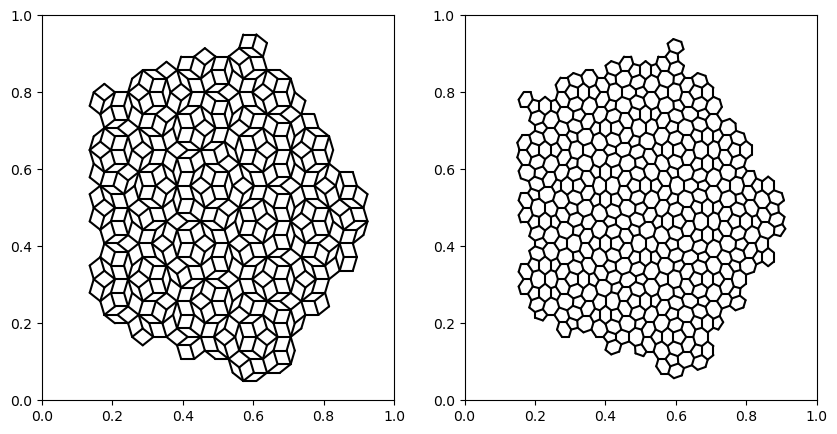

In [11]:
penrose = penrose_tiling(10)

fig, ax = plt.subplots(1,2, figsize=(10,5))
pl.plot_edges(penrose, ax=ax[0])

t2 = gu.remove_trailing_edges(plaquette_to_h(penrose))
pl.plot_edges(t2, ax=ax[1])
